In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

C:\Users\Sivakumar\AppData\Local\Temp\ipykernel_34072\4109505646.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [25]:
url = "Technology.csv"
df = pd.read_csv(url)
df.head()

,Open,High,Low,Close,Volume
0,23.350000,23.35,21.150000,21.150000,124154.0
1,23.900000,24.50,22.200001,22.200001,199628.0
2,24.000000,24.50,22.775000,22.775000,182016.0
3,24.450001,25.00,24.000000,25.000000,90512.0
4,24.299999,25.00,23.950001,23.950001,81260.0


In [26]:
df.drop(df.columns[[2]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,23.350000,23.35,21.150000,124154.0
1,23.900000,24.50,22.200001,199628.0
2,24.000000,24.50,22.775000,182016.0
3,24.450001,25.00,25.000000,90512.0
4,24.299999,25.00,23.950001,81260.0


<h2>Normalizing and removing the null data points</h2>

In [42]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']/100000000
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

              Open          High         Close    Volume
0     2.335000e-07  2.335000e-07  2.115000e-07  0.000124
1     2.390000e-07  2.450000e-07  2.220000e-07  0.000200
2     2.400000e-07  2.450000e-07  2.277500e-07  0.000182
3     2.445000e-07  2.500000e-07  2.500000e-07  0.000091
4     2.430000e-07  2.500000e-07  2.395000e-07  0.000081
...            ...           ...           ...       ...
2707  1.560000e-08  1.560000e-08  1.560000e-08  0.000000
2708  1.710000e-08  1.710000e-08  1.710000e-08  0.000004
2709  1.790000e-08  1.790000e-08  1.790000e-08  0.000002
2710  1.870000e-08  1.870000e-08  1.870000e-08  0.000026
2711  1.880000e-08  1.900000e-08  1.870000e-08  0.000002

[2712 rows x 4 columns]


In [43]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [44]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (2169, 3)
y_train (2169, 1)
X_test (543, 3)
y_test (543, 1)


<h2>Compiling and training the neural network model</h2>

In [45]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
17/17 [==============================] - 0s 6ms/step - loss: 1.0595e-07 - val_loss: 2.2901e-08
Epoch 2/10
17/17 [==============================] - 0s 2ms/step - loss: 1.7686e-08 - val_loss: 2.6074e-10
Epoch 3/10
17/17 [==============================] - 0s 2ms/step - loss: 2.8459e-09 - val_loss: 3.8912e-12
Epoch 4/10
17/17 [==============================] - 0s 2ms/step - loss: 5.2633e-10 - val_loss: 3.6486e-10
Epoch 5/10
17/17 [==============================] - 0s 3ms/step - loss: 1.1144e-10 - val_loss: 1.1878e-11
Epoch 6/10
17/17 [==============================] - 0s 3ms/step - loss: 1.8102e-11 - val_loss: 1.4335e-12
Epoch 7/10
17/17 [==============================] - 0s 2ms/step - loss: 3.1956e-12 - val_loss: 1.8527e-12
Epoch 8/10
17/17 [==============================] - 0s 2ms/step - loss: 6.0526e-13 - val_loss: 9.3629e-14
Epoch 9/10
17/17 [==============================] - 0s 2ms/step - loss: 1.0044e-13 - val_loss: 3.6456e-14
Epoch 10/10
17/17 [===========================

<h2>Predicted Values</h2>

In [46]:
predictions = classifier.predict(X_test)
print(predictions[:10])

17/17 [==============================] - 0s 686us/step
[[-7.843482e-09]
 [-7.828930e-09]
 [-7.843482e-09]
 [-7.799827e-09]
 [-7.828930e-09]
 [-7.828930e-09]
 [-7.828930e-09]
 [-7.828930e-09]
 [-7.799827e-09]
 [-7.843482e-09]]


Execute the trained model

<h2>Calculating the error in the trained Neural Network model</h2>

In [47]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.00 RMSE)
Test Score: 0.00 MSE (0.00 RMSE)


<h2>Predictions vs Real results</h2>

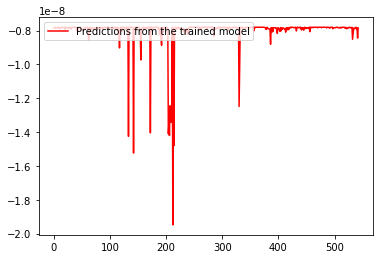

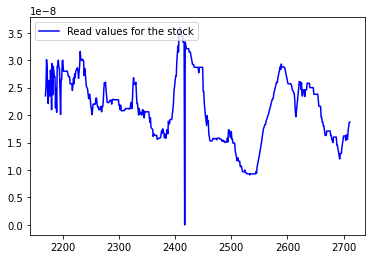

In [48]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()